# Machine Learning : Linear Regression With Multiple Variables


### PROBLEM STATEMENT:
### Create a machine learning model using linear regression that can predict PROFIT for startup based on various factors

The dataset is taken from kaggle .Link for the dataset:https://www.kaggle.com/karthickveerakumar/startup-logistic-regression

### 1)IMPORTING LIBRARIES

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plot
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder , OneHotEncoder


### 2)CREATING DATAFRAME

In [4]:
df=pd.read_csv(r'file:///C:\Users\hp\Downloads\50_Startups.csv')

### 3)UNDERSTANDING THE DATA

In [5]:
df.shape

(50, 5)

In [6]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [9]:
print(df.isnull().sum())

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


### 4)EDA

##### Correlation matrix plot

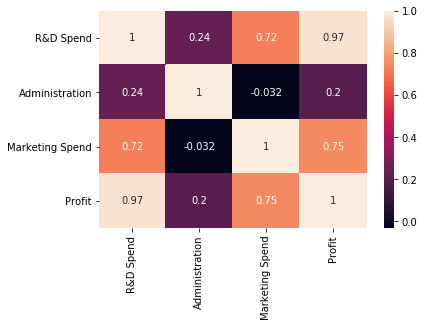

In [10]:
corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot=True)
plot.show()

##### Scatter matrix plot

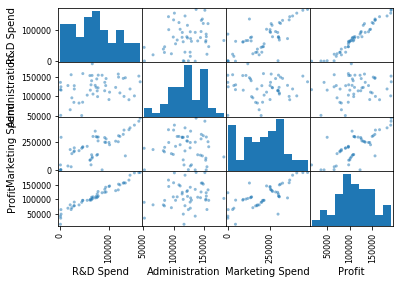

In [11]:
from pandas.plotting import scatter_matrix
scatter_matrix(df)
plot.show()

##### Finding relation between dependent and independent variables

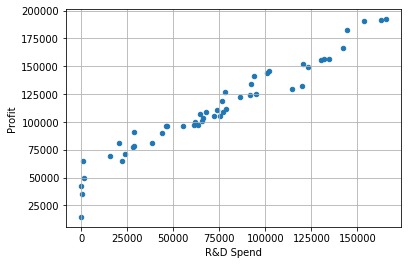

In [12]:
df.plot.scatter(x='R&D Spend', y='Profit')
plot.grid()
plot.show()

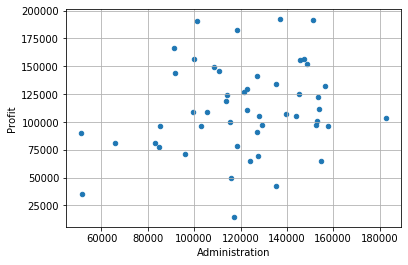

In [13]:
df.plot.scatter(x='Administration', y='Profit')
plot.grid()
plot.show()

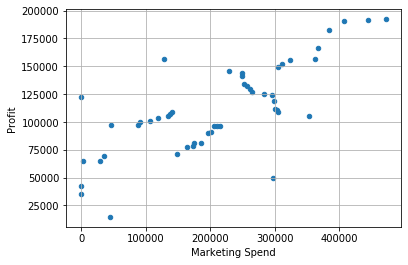

In [14]:
df.plot.scatter(x='Marketing Spend', y='Profit')
plot.grid()
plot.show()

##### Relationship between categorical vs numerical features using box plot

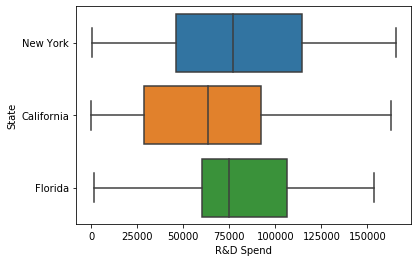

In [15]:
sns.boxplot(y='State', x='R&D Spend', data=df)
plot.show()

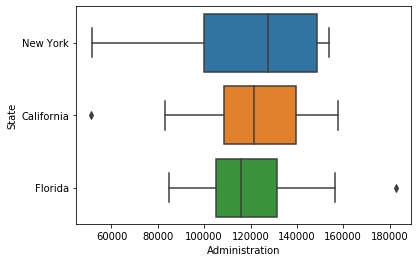

In [16]:
sns.boxplot(y='State', x='Administration', data=df)
plot.show()

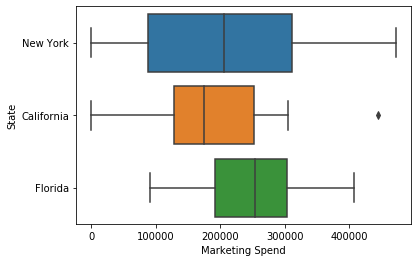

In [17]:
sns.boxplot(y='State', x='Marketing Spend', data=df)
plot.show()

##### Box plot for the target variable

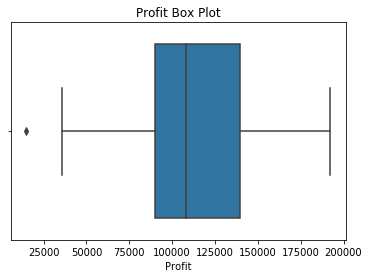

In [18]:
sns.boxplot(df['Profit'])
plot.title('Profit Box Plot')
plot.show()

##### Distribution plot for target variable

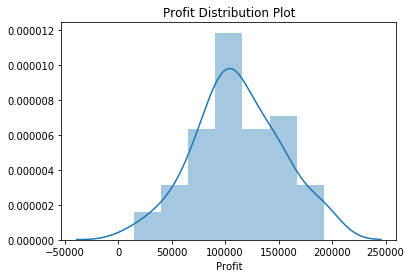

In [19]:
plot.title('Profit Distribution Plot')
sns.distplot(df['Profit'])
plot.show()

Summary : The y variable is linearly distributed. Hence , Linear Regression holds good.

### 5)DATA PREPROCESSING

In [20]:
dummies = pd.get_dummies(df.State)
dummies

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
5,0,0,1
6,1,0,0
7,0,1,0
8,0,0,1
9,1,0,0


In [21]:
df=df.drop(['State'],axis='columns')
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [22]:
merged=pd.concat([df,dummies],axis='columns')
merged.head()


,R&D Spend,Administration,Marketing Spend,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [23]:
final=merged.drop(['California'],axis='columns')
final.head()

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


### 6)CREATING LINEAR REGRESSION OBJECT

In [24]:
X=final.drop('Profit',axis='columns')
y=df.Profit


In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [26]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
prediction=model.predict(X_test)

In [28]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
R&D Spend,0.773467
Administration,0.032885
Marketing Spend,0.036610
Florida,-959.284160
New York,699.369053


In [29]:
data= pd.DataFrame({'Actual':y_test,'Predicted':prediction})
data.head(10)

,Actual,Predicted
28,103282.38,103015.201598
11,144259.40,132582.277608
10,146121.95,132447.738452
41,77798.83,71976.098513
2,191050.39,178537.482211
27,105008.31,116161.242302
38,81229.06,67851.692097
31,97483.56,98791.733747
22,110352.25,113969.435330
4,166187.94,167921.065696


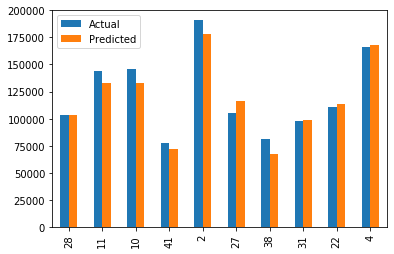

In [30]:
data.plot(kind='bar')
plot.show()

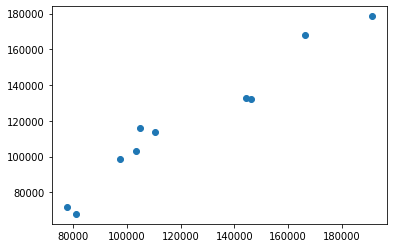

In [31]:
plot.scatter(y_test,prediction)
plot.show()

In [32]:
model.score(X_train,y_train)

0.9501847627493607

In [33]:
model.score(X_test,y_test)

0.9347068473282423

### 7)PREDICTION FOR CUSTOM INPUTS

In [34]:
model.predict([[200000.20, 111111, 40000.10,0 ,0]])

array([202366.00607014])

In [35]:
model.predict([[100000,90000,90000, 1 ,0]])

array([125196.11883697])